## Lauren Thompson
## Clustering Exercise

### Set-up and Read-ins

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('als_data.csv')

1. Remove any data that is not relevant to the patient’s ALS condition.

In [2]:
# Remove irrelevant columns
# data.columns.values

relevant_columns = ['Age_mean', 'Gender_mean', 'onset_site_mean', 'onset_delta_mean', 
                    'onset_site_mean', 'ALSFRS_slope']
data = data[relevant_columns]

2. Apply a standard scalar to the data.

In [3]:
# Initialize the scaler and scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

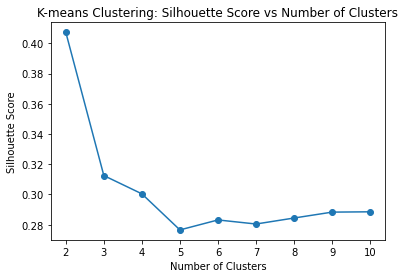

In [5]:
# Initialize lists to store silhouette scores and number of clusters
silhouette_scores = []
num_clusters = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    num_clusters.append(k)

# Create plot
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-means Clustering: Silhouette Score vs Number of Clusters')
plt.show()

4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

The optimal number of clusters can be chosen based on the highest silhouette score. In the plot above, 2 clusters corresponds to the highest silhouette score.

5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [6]:
# Set the optimal number of clusters and fit K-means clustering model with optimal number of clusters
optimal_num_clusters = 2

kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
labels = kmeans.fit_predict(scaled_data)

6. Fit a PCA transformation with two features to the scaled data.

In [7]:
from sklearn.decomposition import PCA

In [8]:
# Initialize PCA model with 2 components and perform PCA transformation on the scaled data
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_data)

7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.

In [9]:
import seaborn as sns

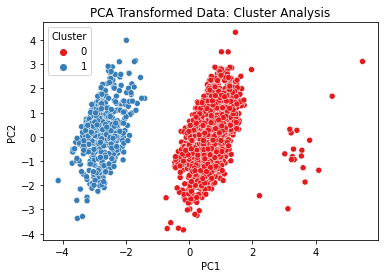

In [10]:
# Create DataFrame for plotting and scatterplot with cluster coloring
pca_df = pd.DataFrame({'PC1': pca_transformed[:, 0], 'PC2': pca_transformed[:, 1], 'Cluster': labels})

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Transformed Data: Cluster Analysis')
plt.show()

8. Summarize your results and make a conclusion.

Analyzing the cluster distribution and characteristics observed in the scatterplot, conclusions can be draw about the ALS patient data within the relevant columns. The identified clusters may represent distinct subgroups of ALS patients based on their features, providing insights for further analysis and decision-making in patient care or research. Here there are outliers indicating there are variables that do not align with the clusters characteristics.